In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim
from tqdm import tqdm
import regex as re

In [2]:
df = pd.read_csv(r'Stormdata & FireStations geadresseerd.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('Incident_ID')
df

,Incident_Starttime,Incident_Endtime,Incident_Duration,Incident_Priority,Service_Area,Damage_Type,Municipality,LON,LAT,Day,Month,Year,City,Suburb,Residential,Road,Zipcode
Incident_ID,,,,,,,,,,,,,,,,,
511,08:25:18,10:00:56,95.633,2.0,Amstelveen,Tree,Amstelveen,4.838685,52.281552,7,9,2018,NaN,NaN,NaN,Bouwerij,1185 XW
738,16:46:38,18:00:55,74.283,2.0,Victor,Tree,Amsterdam,4.930968,52.359724,10,9,2018,Amsterdam,Oost,Dapperbuurt,Linnaeusplantsoen,1093 KL
739,17:11:20,18:01:00,49.667,2.0,Dirk,Building,Amsterdam,4.898818,52.357071,10,9,2018,Amsterdam,Zuid,Oude Pijp,Nicolaas Berchemstraat,1073 VR
1335,19:17:33,20:41:29,83.933,2.0,Zebra,"Fence, Road signs, Scaffolding",Amsterdam,4.960809,52.392155,18,9,2018,Amsterdam,Noord,Nieuwendam,Markengouw,1024 CX
1493,06:59:05,08:21:25,82.333,2.0,Amstelveen,Tree,Amstelveen,4.879741,52.301365,21,9,2018,NaN,NaN,NaN,Oranjebaan,1183 PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,18:03:05,19:18:29,75.400,2.0,Nico,Other,Amsterdam,4.896493,52.370812,7,9,2023,Amsterdam,Centrum,Burgwallen-Oude Zijde,Oudezijds Achterburgwal,1012 DJ
439079,00:51:36,02:20:34,88.967,2.0,Teunis,Other,Amsterdam,4.879589,52.392941,8,9,2023,Amsterdam,West,Revaleiland,Revaleiland,1014 ZG
439150,04:42:15,05:06:44,24.483,2.0,Hendrik,Other,Amsterdam,4.878302,52.368084,9,9,2023,Amsterdam,Centrum,NaN,Marnixstraat,1016 XS


In [3]:
#Extracts the first 4 digits of zipcode '1010 AA' --> '1010' 
def extract_zip_4(
    df,
    zip_col,
    new_col,
):
    pattern = r'\d{4}'
    df[new_col] = [re.match(pattern, zip_code)[0] if isinstance(zip_code, str) else None for zip_code in df[zip_col].values]
    return df


In [4]:
df_tree_incidents = df[df["Damage_Type"]=="Tree"]
df_tree_incidents = extract_zip_4(df=df_tree_incidents, zip_col='Zipcode', new_col='Zip4')

/var/folders/q3/3z4n8f9n2v9fphcv29rfd_4w0000gn/T/ipykernel_32951/3978418749.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = [re.match(pattern, zip_code)[0] if isinstance(zip_code, str) else None for zip_code in df[zip_col].values]


In [5]:
df_tree_incidents

,Incident_Starttime,Incident_Endtime,Incident_Duration,Incident_Priority,Service_Area,Damage_Type,Municipality,LON,LAT,Day,Month,Year,City,Suburb,Residential,Road,Zipcode,Zip4
Incident_ID,,,,,,,,,,,,,,,,,,
511,08:25:18,10:00:56,95.633,2.0,Amstelveen,Tree,Amstelveen,4.838685,52.281552,7,9,2018,NaN,NaN,NaN,Bouwerij,1185 XW,1185
738,16:46:38,18:00:55,74.283,2.0,Victor,Tree,Amsterdam,4.930968,52.359724,10,9,2018,Amsterdam,Oost,Dapperbuurt,Linnaeusplantsoen,1093 KL,1093
1493,06:59:05,08:21:25,82.333,2.0,Amstelveen,Tree,Amstelveen,4.879741,52.301365,21,9,2018,NaN,NaN,NaN,Oranjebaan,1183 PL,1183
1502,08:29:22,10:06:43,97.350,2.0,Dirk,Tree,Amsterdam,4.870656,52.355189,21,9,2018,Amsterdam,Zuid,Museumkwartier,Van Breestraat,1071 ZM,1071
1507,09:25:55,11:43:54,137.983,2.0,Teunis,Tree,Amsterdam,4.832333,52.380748,21,9,2018,Amsterdam,Nieuw-West,NaN,M.C. Addicksstraat,1063 VZ,1063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436479,18:47:00,20:36:09,109.150,5.0,Victor,Tree,Amsterdam,4.944491,52.352064,31,7,2023,Amsterdam,Oost,Middenmeer,Rutherfordstraat,1098 TM,1098
436603,14:10:34,15:13:30,62.933,2.0,Osdorp,Tree,Amsterdam,4.824533,52.376163,2,8,2023,Amsterdam,Nieuw-West,NaN,Louis Couperusstraat,1064 CE,1064
436834,03:38:27,06:29:11,170.733,5.0,Nico,Tree,Amsterdam,4.928197,52.390568,6,8,2023,Amsterdam,Noord,Tuindorp Buiksloot,Nieuwendammerdijk,1025 LP,1025


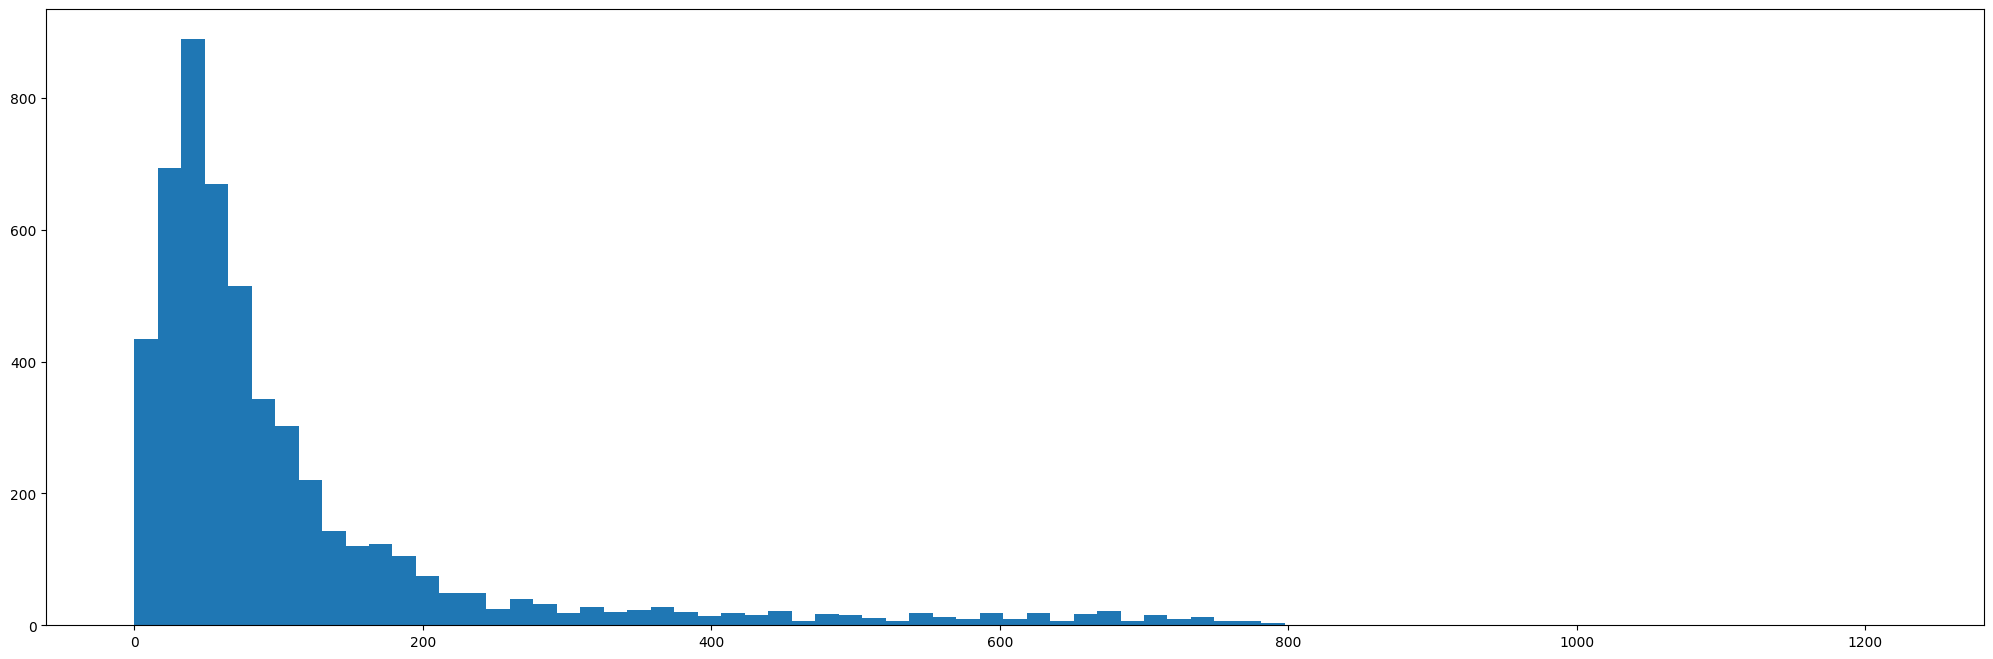

In [6]:
plt.figure(figsize = (25,8))
plt.hist(df['Incident_Duration'], 75)
plt.show()

In [7]:
df.Service_Area.unique().tolist()

['Amstelveen',
 'Victor',
 'Dirk',
 'Zebra',
 'Teunis',
 'Nico',
 'Anton',
 'Pieter',
 'Willem',
 'Aalsmeer',
 'Hendrik',
 'Osdorp',
 'Duivendrecht',
 'Diemen',
 'Driemond',
 'IJsbrand',
 'GBA',
 'Uithoorn',
 'Broek in Waterland',
 'ZAANDAM PB FICTIEF',
 'Muiden',
 'Weesp',
 'Zaandam-Prinsbernardplein']

In [8]:
trees = pd.read_csv(r'Data_bomen/BOMEN_DATA.csv')
trees

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,SDVIEW,RADIUS,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,3,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,1,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267969,267970,4300112,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.8470521 52.351648),POINT(52.351648 4.8470521),4.847052,52.351648
267970,267971,4300113,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.8468539 52.351646),POINT(52.351646 4.8468539),4.846854,52.351646
267971,267972,4300114,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.846677 52.351643),POINT(52.351643 4.846677),4.846677,52.351643
267972,267973,4300115,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.846455 52.351643),POINT(52.351643 4.846455),4.846455,52.351643


In [14]:
def add_zipcode(
    df
):
    geolocator = Nominatim(user_agent="my_request")
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing"):
        Latitude = row['LAT']
        Longitude = row['LNG']
        
        location = geolocator.reverse(f"{Latitude},{Longitude}")
        address = location.raw['address']
    
        zipcode = str(address.get('postcode'))  
        
        df.at[index, 'Zipcode'] = zipcode
    return df




In [10]:
trees.boomhoogteklasseActueel.unique().tolist()

['b. 6 tot 9 m.',
 'c. 9 tot 12 m.',
 'a. tot 6 m.',
 nan,
 'q. Niet van toepassing',
 'e. 15 tot 18 m.',
 'd. 12 tot 15 m.',
 'f. 18 tot 24 m.',
 'g. 24 m. en hoger']

In [39]:
geolocator = Nominatim(user_agent="my_agent")

location = geolocator.geocode(query={'postalcode':'1018GP', 'country':'Nederland'}, addressdetails=True)
print(location.raw['boundingbox'])

['52.2011688', '52.5211688', '4.7488902', '5.0688902']


In [42]:
#Map zips to coordinates

# zipcodes = df_tree_incidents['Zipcode'].unique()
# zip_dict = {}
# for code in tqdm(zipcodes, desc="Processing ZIP codes"):
#     result = geolocator.geocode(query={'postalcode': code, 'country': 'Nederland'}, addressdetails=True)
#     if result is not None and 'boundingbox' in result.raw:
#         zip_dict[code] = result.raw['boundingbox']

# import json
# with open(f"Data_bomen/zipcodes_boxes.json", 'w') as f:
#     json.dump(zip_dict, f)

Processing ZIP codes: 100%|██████████| 1337/1337 [11:08<00:00,  2.00it/s]


In [63]:
def find_zip(
    point,
    zip_dict
):
    lon, lat = float(point[0]), float(point[1])
    for zip_code, box in zip_dict.items():
        min_lat, max_lat, min_lon, max_lon = map(float, box)
        if min_lat <= lat <= max_lat and min_lon <= lon <= max_lon:
            return zip_code
    return None

def map_point_to_zip(
    df,
    zip_dict
):
    for i, row in tqdm(df.iterrows()):
        p = (row['LNG'], row["LAT"])
        zip_code = find_zip(p, zip_dict)
        df.at[i, 'Zipcode'] = zip_code
    return df

In [69]:
import json

with open("Data_bomen/zipcodes_boxes.json", 'r') as f:
    zip_dict = json.load(f)

trees = map_point_to_zip(trees, zip_dict)
trees = extract_zip_4(df=trees, zip_col='Zipcode', new_col='Zip4')

# trees.to_csv("BOMEN_DATA_WITH_ZIP.csv", sep=",", encoding="utf-8")

267974it [00:10, 24606.76it/s]


In [70]:
# 

In [ ]:
import pandas as pd

# Assuming 'trees' is your DataFrame and 'boomhoogteklasseActueel' is the column of interest
nan_count = trees['boomhoogteklasseActueel'].isna().sum()
not_applicable_count = (trees['boomhoogteklasseActueel'] == 'q. Niet van toepassing').sum()
total_count = len(trees)

percentage = ((nan_count + not_applicable_count) / total_count) * 100

print(f"The percentage of 'nan' or 'q. Niet van toepassing' in the 'boomhoogteklasseActueel' column is {percentage:.2f}%")


The percentage of 'nan' or 'q. Niet van toepassing' in the 'boomhoogteklasseActueel' column is 3.08%


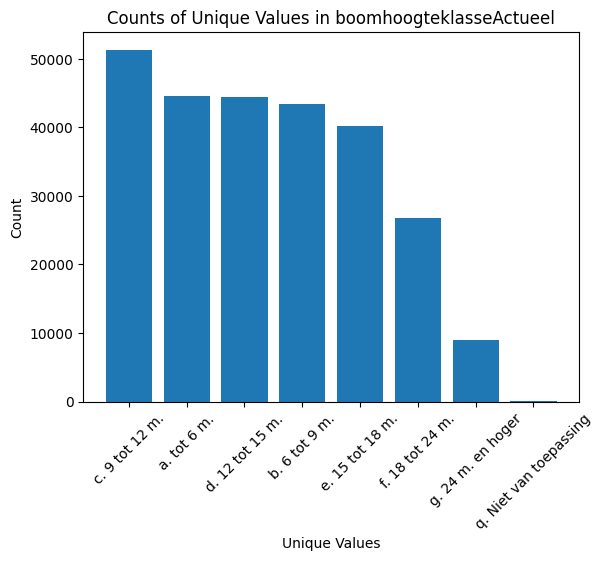

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Count the occurrences of each unique value in the column
value_counts = trees['boomhoogteklasseActueel'].value_counts()

# Plot a bar chart
plt.bar(value_counts.index, value_counts.values)
plt.title('Counts of Unique Values in boomhoogteklasseActueel')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
hbs_lijnen = pd.read_csv(r'Data_bomen/HBS_LIJNEN.csv')
hbs_lijnen

,OBJECTNUMMER,ElementID,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,1,"LINESTRING(4.969756 52.355647,4.969934 52.3555...","LINESTRING(52.355647 4.969756,52.355579 4.9699...",4.994925,52.330226
1,2,2,"LINESTRING(4.748164 52.407466,4.748079 52.4072...","LINESTRING(52.407466 4.748164,52.407288 4.7480...",4.746942,52.402232
2,3,3,"LINESTRING(4.749585 52.412086,4.74933 52.41023...","LINESTRING(52.412086 4.749585,52.41023 4.74933...",4.748875,52.409776
3,4,4,"LINESTRING(4.727775 52.330301,4.732677 52.3337...","LINESTRING(52.330301 4.727775,52.333711 4.7326...",4.743627,52.342176
4,5,5,"LINESTRING(4.762931 52.352633,4.762383 52.3521...","LINESTRING(52.352633 4.762931,52.352143 4.7623...",4.745357,52.341189
...,...,...,...,...,...,...
818,819,819,"LINESTRING(4.972688 52.298624,4.978021 52.3005...","LINESTRING(52.298624 4.972688,52.300511 4.9780...",4.975408,52.303100
819,820,820,"LINESTRING(4.971056 52.308392,4.967626 52.312162)","LINESTRING(52.308392 4.971056,52.312162 4.967626)",4.969341,52.310277
820,821,821,"LINESTRING(4.947073 52.299899,4.954937 52.3026...","LINESTRING(52.299899 4.947073,52.302613 4.9549...",4.951005,52.303238
821,822,822,"LINESTRING(4.950842 52.29499,4.947469 52.29870...","LINESTRING(52.29499 4.950842,52.298701 4.94746...",4.949000,52.297222
